<a href="https://colab.research.google.com/github/RobDeutsche/CISC499/blob/main/Copy_of_Module13_Homework_LoanApprovalPrediction_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Change the print statement below to show your name:

In [1]:
print("Rob Deutsche")

Rob Deutsche


# Loan Approval Prediction

This notebook is based on the loan approval prediction - [Loan Prediction](https://www.kaggle.com/ninzaami/loan-predication/home) dataset. Loan approvals are a popular problem in the credit/banking industry. How can we correctly predict if the loan is safe to be approved or not? This is what we will be looking into in this notebook.

## 1. Import Packages & Data

In [2]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

#Read CSV data
data = pd.read_csv("./Homework13_Dataset_LoanApprovalPrediction.csv")

#Looking at basic stats of data
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [3]:
#preview data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 2. Data Quality & Missing Value Assesment

In [4]:
#Preview data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#Check missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Gender - Missing Values

In [6]:
# percent of missing "Gender" 
print('Percent of missing "Gender" records is %.2f%%' %((data['Gender'].isnull().sum()/data.shape[0])*100))

Percent of missing "Gender" records is 2.12%


Number of people who take a loan group by gender :
Male      489
Female    112
Name: Gender, dtype: int64


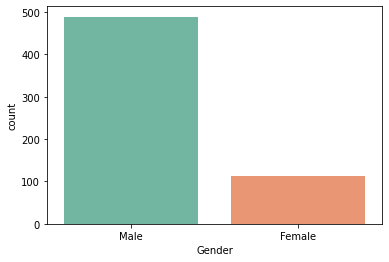

In [26]:
print("Number of people who take a loan group by gender :")
print(data['Gender'].value_counts())
sns.countplot(x='Gender', data=data, palette = 'Set2')

### Married - Missing Values

In [8]:
# percent of missing "Married" 
print('Percent of missing "Married" records is %.2f%%' %((data['Married'].isnull().sum()/data.shape[0])*100))

Percent of missing "Married" records is 0.49%


Number of people who take a loan group by marital status :
Yes    398
No     213
Name: Married, dtype: int64


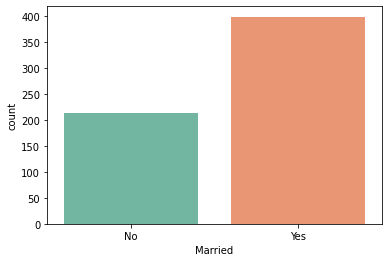

In [9]:
print("Number of people who take a loan group by marital status :")
print(data['Married'].value_counts())
sns.countplot(x='Married', data=data, palette = 'Set2')

### Dependents- Missing Values

In [10]:
# percent of missing "Dependents" 
print('Percent of missing "Dependents" records is %.2f%%' %((data['Dependents'].isnull().sum()/data.shape[0])*100))

Percent of missing "Dependents" records is 2.44%


Number of people who take a loan group by dependents :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


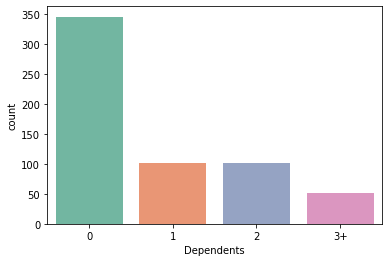

In [12]:
print("Number of people who take a loan group by dependents :")
print(data['Dependents'].value_counts())
sns.countplot(x='Dependents', data=data, palette = 'Set2')

### Self Employed - Missing Values

In [13]:
# percent of missing "Self_Employed" 
print('Percent of missing "Self_Employed" records is %.2f%%' %((data['Self_Employed'].isnull().sum()/data.shape[0])*100))

Percent of missing "Self_Employed" records is 5.21%


Number of people who take a loan group by self employed :
No     500
Yes     82
Name: Self_Employed, dtype: int64


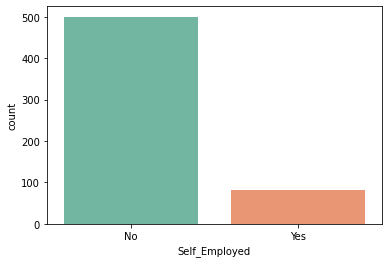

In [14]:
print("Number of people who take a loan group by self employed :")
print(data['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=data, palette = 'Set2')

### Loan Amount - Missing Values

In [15]:
# percent of missing "LoanAmount" 
print('Percent of missing "LoanAmount" records is %.2f%%' %((data['LoanAmount'].isnull().sum()/data.shape[0])*100))

Percent of missing "LoanAmount" records is 3.58%


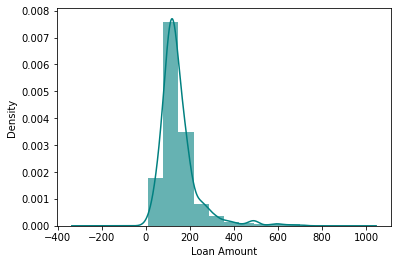

In [16]:
ax = data["LoanAmount"].hist(density=True, stacked=True, color='teal', alpha=0.6)
data["LoanAmount"].plot(kind='density', color='teal')
ax.set(xlabel='Loan Amount')
plt.show()

### Loan Amount Term - Missing Values

In [17]:
# percent of missing "Loan_Amount_Term" 
print('Percent of missing "Loan_Amount_Term" records is %.2f%%' %((data['Loan_Amount_Term'].isnull().sum()/data.shape[0])*100))

Percent of missing "Loan_Amount_Term" records is 2.28%


Number of people who take a loan group by loan amount term :
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


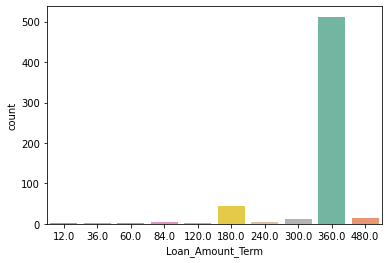

In [18]:
print("Number of people who take a loan group by loan amount term :")
print(data['Loan_Amount_Term'].value_counts())
sns.countplot(x='Loan_Amount_Term', data=data, palette = 'Set2')

### Credit History - Missing Values

In [19]:
# percent of missing "Credit_History" 
print('Percent of missing "Credit_History" records is %.2f%%' %((data['Credit_History'].isnull().sum()/data.shape[0])*100))

Percent of missing "Credit_History" records is 8.14%


Number of people who take a loan group by credit history :
1.0    475
0.0     89
Name: Credit_History, dtype: int64


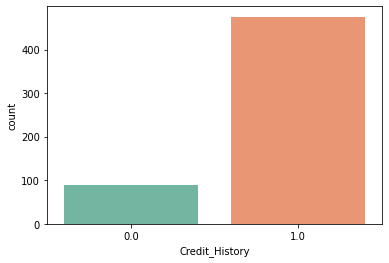

In [20]:
print("Number of people who take a loan group by credit history :")
print(data['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=data, palette = 'Set2')

## 3. Final Adjustments to Data

Based on my assessment of the missing values in the dataset, I'll make the following changes to the data:

* If "Gender" is missing for a given row, I'll impute with Male (most common answer).
* If "Married" is missing for a given row, I'll impute with yes (most common answer).
* If "Dependents" is missing for a given row, I'll impute with 0 (most common answer).
* If "Self_Employed" is missing for a given row, I'll impute with no (most common answer).
* If "LoanAmount" is missing for a given row, I'll impute with mean of data.
* If "Loan_Amount_Term" is missing for a given row, I'll impute with 360 (most common answer).
* If "Credit_History" is missing for a given row, I'll impute with 1.0 (most common answer).

In [31]:
#adding most common values for missing values (rather than removing data altogether)
train_data = data.copy()
train_data['Gender'].fillna(train_data['Gender'].value_counts().idxmax(), inplace=True)
train_data['Married'].fillna(train_data['Married'].value_counts().idxmax(), inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].value_counts().idxmax(), inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].value_counts().idxmax(), inplace=True)
train_data["LoanAmount"].fillna(train_data["LoanAmount"].mean(skipna=True), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].value_counts().idxmax(), inplace=True)

In [32]:
#Check missing values
print(train_data.isnull().sum())
train_data

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [33]:
#Convert some object data type to int64
gender_stat = {'Female': 0, 'Male': 1}
yes_no_stat = {'No' : 0,'Yes' : 1}
#converting string number to int number  
dependents_stat = {'0':0,'1':1,'2':2,'3+':3}
#converting string number to binary
education_stat = {'Not Graduate' : 0, 'Graduate' : 1}
#converting string number to categorical number
property_stat = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}

train_data['Gender'] = train_data['Gender'].replace(gender_stat)
train_data['Married'] = train_data['Married'].replace(yes_no_stat)
train_data['Dependents'] = train_data['Dependents'].replace(dependents_stat)
train_data['Education'] = train_data['Education'].replace(education_stat)
train_data['Self_Employed'] = train_data['Self_Employed'].replace(yes_no_stat)
train_data['Property_Area'] = train_data['Property_Area'].replace(property_stat)

In [34]:
#Preview train_data information
train_data.info()
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## 4. Making Prediction

In [35]:
#Separate feature and target
x = train_data.iloc[:,1:12]
y = train_data.iloc[:,12]

#make variabel for save the result and to show it
classifier = ('Random Forest','Decision Tree','K-Nearest Neighbor','SVM')
y_pos = np.arange(len(classifier))
score = []

In [36]:
clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuracy of classification is %.2f%%' %(scores.mean()*100))

The accuracy of classification is 75.24%


In [37]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuracy of classification is %.2f%%' %(scores.mean()*100))

The accuracy of classification is 70.20%


In [38]:
clf = KNeighborsClassifier()
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuracy of classification is %.2f%%' %(scores.mean()*100))

The accuracy of classification is 61.40%


In [39]:
clf  =  svm.LinearSVC(max_iter=5000)
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuracy of classification is %.2f%%' %(scores.mean()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


The accuracy of classification is 57.02%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


## 5. Result

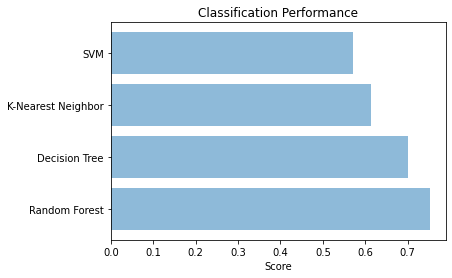

In [40]:
plt.barh(y_pos, score, align='center', alpha=0.5)
plt.yticks(y_pos, classifier)
plt.xlabel('Score')
plt.title('Classification Performance')
plt.show()

In [ ]:
# Which Classifier Had the Highest Score?
Random Forest

## Reference
1. J. Heo and J. Y. Yang, "AdaBoost Based Bankruptcy Forecasting of Korean Construction Company," Applied Soft Computing, vol. 24, pp. 494-499, 2014.
2. C.-F. Tsai, "Feature Selection in Bankruptcy Prediction," Knowledge Based System, pp. 120-127, 2009.